\title{Continues HDL Sinewave Generator via Chebyshev Polynomial Approximation in Python's myHDL}
\author{Steven K Armour}
\maketitle

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Python-Libraries-Utilized" data-toc-modified-id="Python-Libraries-Utilized-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python Libraries Utilized</a></div><div class="lev1 toc-item"><a href="#Acknowledgments" data-toc-modified-id="Acknowledgments-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Acknowledgments</a></div><div class="lev1 toc-item"><a href="#Derivation-of-the-Chebyshev-Polynomial-Approximation-for-Cos" data-toc-modified-id="Derivation-of-the-Chebyshev-Polynomial-Approximation-for-Cos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Derivation of the Chebyshev Polynomial Approximation for Cos</a></div><div class="lev2 toc-item"><a href="#Chebyshev-Polynomials" data-toc-modified-id="Chebyshev-Polynomials-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Chebyshev Polynomials</a></div><div class="lev3 toc-item"><a href="#Plot-of-Chebyshev-Polynomials" data-toc-modified-id="Plot-of-Chebyshev-Polynomials-311"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Plot of Chebyshev Polynomials</a></div><div class="lev2 toc-item"><a href="#Chebyshev-Polynomial-cos-Relationship" data-toc-modified-id="Chebyshev-Polynomial-cos-Relationship-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Chebyshev Polynomial $\cos$ Relationship</a></div><div class="lev2 toc-item"><a href="#Sinusoid-Generator-Algorithm-Development" data-toc-modified-id="Sinusoid-Generator-Algorithm-Development-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Sinusoid Generator Algorithm Development</a></div><div class="lev3 toc-item"><a href="#Future-additions" data-toc-modified-id="Future-additions-331"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Future additions</a></div><div class="lev1 toc-item"><a href="#Test-Bench-for-Sinusoid-Generator" data-toc-modified-id="Test-Bench-for-Sinusoid-Generator-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Test Bench for Sinusoid Generator</a></div><div class="lev1 toc-item"><a href="#Post-Processing-of-Test-Bench" data-toc-modified-id="Post-Processing-of-Test-Bench-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Post Processing of Test Bench</a></div><div class="lev1 toc-item"><a href="#RTL-Synthisis" data-toc-modified-id="RTL-Synthisis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>RTL Synthisis</a></div><div class="lev1 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></div><div class="lev1 toc-item"><a href="#Refrances" data-toc-modified-id="Refrances-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Refrances</a></div>

# Python Libraries Utilized

In [4]:
import numpy as np
import pandas as pd
from sympy import *
init_printing()
from IPython.display import display, Math, Latex
 
from myhdl import *
from myhdlpeek import Peeker

import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'myhdl'

# Acknowledgments
The orgianl Chebyshev Sinwave Genrator written in myHDL was done by ["HARDSOFTLUCID"](https://hardsoftlucid.wordpress.com/various-stuff/myhdl/)
(myHDL.old version [here](https://github.com/jandecaluwe/site-myhdl-retired/blob/master/_ori/pages/projects/continuous_wave_sinusgenerator.txt))

Author of myHDL [Jan Decaluwe](http://www.myhdl.org/users/jandecaluwe.html) and the author of the myHDL Peeker [XESS Corp.](https://github.com/xesscorp/myhdlpeek)



# Derivation of the Chebyshev Polynomial Approximation for Cos

## Chebyshev Polynomials

We Start with recalling that the double(n) angle trig identity of $\cos$ for $n=2$ is
$$\cos(2\theta)= \cos(\theta)^2 -\sin(\theta)^2 = 2\cos(\theta)^2 -1$$
and for $n=3$ is 
$$\cos(3\theta)= cos(\theta)^3 -3\sin(\theta)^2 \cos(\theta)=4\cos(\theta)^3 -3\cos(\theta)$$

Now exploiting Chebyshev polynomials that come from the power series solution($y(x)=\sum_{n=0}^{\infty} a_n x^n$) of  Chebyshev differential equation:
$$(1-x^2)y" -xy'+p^2y=0$$

The Power series solution takes on the form of a Recurrence relation for the $a_n$ term in the Power series as
$$a_{n+2}=\dfrac{(n-p)(n+p)}{(n+1)(n+2)}a_n$$
for $x\in [-1, 1]$
that leads to the Chebyshev polynomial defined as
$$T_0(x)=1$$
$$T_1(x)=x$$
$$T_{n+1}(x)=2xT_n(x)-T_{n-1}(x)$$





### Plot of Chebyshev Polynomials

In [5]:
x=np.linspace(-1.0, 1.0)
fig=plt.figure()
ax=plt.subplot(111)
for i in range(1,8+1):
    coeff=[0]*i
    coeff[-1]=i
    y=np.polynomial.Chebyshev(coeff)(x)
    ax.plot(x, y, label=f'$T_{i-1}(x)$')
bbox_to_anchor=ax.get_position()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid()
plt.title(r"Chebyshev Polynomials $T_0(x)-T_1(x), x\in[-1, 1]$" )
None

NameError: name 'plt' is not defined

## Chebyshev Polynomial $\cos$ Relationship


If now $T_n(x)=T_n(cos(\theta))=cos(n\theta)$ we have

$$T_0(\cos(0\cdot\theta))=1$$
$$T_1(\cos(1\cdot\theta))=\cos(\theta)$$
$$T_{n+1}(\cos(\theta))=2 \cos(\theta)T_n(\cos(\theta))-T_{n-1}(\cos(\theta))$$
$$\cos((n+1)\theta)=2\cos(\theta)\cos(n\theta)-\cos((n-1)\theta)$$

solving for $\cos(\theta)$ we get

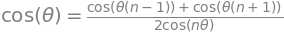

In [6]:
n, theta=symbols('n, theta')
LHS=cos(theta)
RHS=(cos((n+1)*theta)+cos((n-1)*theta))/(2*cos(n*theta))
Eq(LHS, RHS)

notice that the RHS can be simplified to

In [7]:
simplify(RHS)

In [8]:
#numericalize symbolic
RHSN=lambdify((n, theta), RHS, dummify=False)

fig=plt.figure()
ax=plt.subplot(111)

thetaN=np.linspace(0, 2*np.pi)
for N in range(1, 8+1):
    y=RHSN(N, thetaN)
    ax.plot(thetaN, y, label=f'$C_{N-1} aprox$')
ax.plot(thetaN, np.cos(thetaN), label=r'$cos(\theta)$')
ax.grid()

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r"Plot of $\cos(\theta), \theta \in[0, 2\pi]$ & $N\in[0, 7]$ CP Approx.")
None

NameError: name 'plt' is not defined

In [ ]:
thetaN=np.linspace(0, 2*np.pi)
for N in range(1, 8+1):
    y=np.cos(thetaN)-RHSN(N, thetaN)
    plt.plot(thetaN, y, label=f'$C_{N-1} error$')
plt.grid()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r"Plot of error of $\cos(\theta), \theta \in[0, 2\pi]$ & $N\in[0, 7]$ CP Aprox")

None

##  Sinusoid Generator Algorithm Development

now letting $\cos(\theta)=\cos(2*\pi f_{\cos}/f_{clk})=T_1(x)$ we can translate the recursion relationship for the Chebyshev polynomials into relationships between regestes calls as follows. Let $$T_{n+1}(x)=2xT_n(x)-T_{n-1}(x)$$ become
$$R_2=K \cdot R_1 -R_0$$
that is we we replace the $2x$ by a constant factor $K$ and utilize the subscripts as designations of our registers. Furthermore we know that after one call of our recursion relationship $R_2$ ($T_{n+1}(x))$) will now become our old value $R_0$ ($T_{n-1}(x)$) thus we have
$$R_0=R_2$$
$$R_2=K \cdot R_1 -R_0$$

further it can be shown that $R_2$ is just the next state value of the $R_1$ so that the above becomes 

$$R_0=R_1$$
$$R_1'=K \cdot R_1 -R_0$$

where $'$ is used to indicate next state

And because the multiplication of two 30 bit numbers will generate a 60 bit number the result needs to be down shifted since the full 30 bits of the register are not being utilized to prevent overflow.

$$R_0=R_1$$
$$R_1'=((K \cdot R_1)>>(\text{size of}R_1 -1 )) -R_0$$




In [ ]:
def SinGenerator(SinFreq_parm, ClkFreq_parm, SinValue_out, 
                clk, rst, ena):
    #contorl byte size and works with -1 to translate cos to sin
    INTERNALWIDTH=len(SinValue_out)-2 
    
    #qunitited version of the 2x for cos(\theta)
    KONSTANT_FACTOR=int(np.cos(2*np.pi * SinFreq_parm /ClkFreq_parm)* 2**(INTERNALWIDTH))
    
    #prep the Needed regesters at sysnthis 
    Reg_T0=Signal(intbv((2**(INTERNALWIDTH))-1, 
                        min=SinValue_out.min, max=SinValue_out.max))
    Reg_T1=Signal(intbv(KONSTANT_FACTOR, 
                        min=SinValue_out.min, max=SinValue_out.max))
    
    #define the polynomal logic
    @always(clk.posedge,rst.negedge)
    def logicCP():
        #clear and prep the regesters
        if rst== 0 :
            Reg_T0.next=(2**(INTERNALWIDTH))-1
            Reg_T1.next=KONSTANT_FACTOR
        
        #run a single recursion iterration of the polynomal
        else:
            if ena==1:
                # recursive Chebyshev  formulation for sinus waveform calculation
                Reg_T0.next=Reg_T1
                #>> shift is a overflow wrapper
                Reg_T1.next=((KONSTANT_FACTOR * Reg_T1)>>(INTERNALWIDTH-1)) - Reg_T0
    
    #pole the R1 for the value of the sin function
    @always_comb
    def comb_logic():
        SinValue_out.next=Reg_T1
  
    return instances()

### Future additions 
need to add a Amp, Freq, phase modulation to this so as to convert the cos output to any sinusoidal output

# Test Bench for Sinusoid Generator

In [9]:
SinFreq=0.75e6   # make a 1.45 mhz Sinus
clkFreq=10e6   # 10 mhz
clkPeriod=1.0/clkFreq

OUTPUT_BITWIDTH=30

Peeker.clear()

SinValue_out=Signal(intbv(0, min=-2**OUTPUT_BITWIDTH, max=2**OUTPUT_BITWIDTH))
Peeker(SinValue_out, 'SinVal')
SinValueTracker=[]

clk=Signal(bool(0)); Peeker(clk, 'clk')
ena=Signal(bool(0)); Peeker(ena, 'ena')
rst=Signal(bool(0)); Peeker(rst, 'rst')

DUT=SinGenerator(SinFreq_parm=SinFreq, ClkFreq_parm=clkFreq, SinValue_out=SinValue_out, 
                clk=clk, rst=rst, ena=ena)


def SinGenerator_TB(TestClkCyc=200):
  
    
    
    #clock genrator
    @always(delay(int(clkPeriod*0.5*1e9)))  ## delay in nano seconds
    def clkGen():
        clk.next = not clk
    
    # accterla test procdure
    @instance
    def stimulus(): 
        while 1:
            rst.next=0
            ena.next=0
            #wait one clock cycle
            yield clk.posedge
            
            #test reset
            rst.next=1
            
            #wait one clock cycle
            yield clk.posedge
            
            #run the sin wave genrator
            ena.next=1
            #run the test for 200 clock cycles
            for i in range(TestClkCyc):
                #wait for next clock cycle
                yield clk.posedge
                SinValueTracker.append(int(SinValue_out))
            raise StopSimulation


    return instances()

NameError: name 'Peeker' is not defined

!? Peeker is failing for some reason to capture all these values so having to improvice 

In [10]:
N=200
sim = Simulation(DUT, SinGenerator_TB(TestClkCyc=N), *Peeker.instances()).run()
#Peeker.to_wavedrom(start_time=0, stop_time=20, tock=True)

NameError: name 'Simulation' is not defined

# Post Processing of Test Bench

In [11]:
SinGenOutDF=pd.DataFrame(columns=['GenValue'], data=SinValueTracker)
SinGenOutDF['Time[s]']=np.arange(0.0,clkPeriod*(len(SinGenOutDF)-0.5),clkPeriod)
SinGenOutDF['GenValueNorm']=SinGenOutDF['GenValue']/SinGenOutDF['GenValue'].max()
SinGenOutDF['f[Hz]']=np.arange(-clkFreq/2.0,clkFreq/2.0,clkFreq/(len(SinValueTracker)))

FFT=np.fft.fftshift(np.fft.fft(SinGenOutDF['GenValueNorm']))
SinGenOutDF['FFTMag']=np.abs(FFT)
SinGenOutDF['FFTPhase']=np.angle(FFT)
SinGenOutDF.head(5)

NameError: name 'SinValueTracker' is not defined

In [12]:
CosDF=pd.DataFrame(columns=['Time[s]'], data=np.arange(0.0,clkPeriod*(len(SinGenOutDF)-0.5),clkPeriod))
CosDF['Cos']=np.cos(2*np.pi*SinFreq*CosDF['Time[s]'])
CosDF['CosS']=CosDF['Cos']*SinGenOutDF['GenValue'].max()
CosDF['f[Hz]']=np.arange(-clkFreq/2.0,clkFreq/2.0,clkFreq/(len(SinValueTracker)))
FFT=np.fft.fftshift(np.fft.fft(CosDF['Cos']))
CosDF['FFTMag']=np.abs(FFT)
CosDF['FFTPhase']=np.angle(FFT)
CosDF.head(5)

NameError: name 'SinGenOutDF' is not defined

In [13]:
fig, [ax0, ax1]=plt.subplots(nrows=2, ncols=1, sharex=False)
plt.suptitle(f'Plots of Sin Generator output in time for {N} Cycles')

SinGenOutDF.plot(use_index=True ,y='GenValue', ax=ax0)
CosDF.plot(use_index=True, y='CosS', ax=ax0)
ax0.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax0.legend(loc='best')

SinGenOutDF.plot(x='Time[s]', y='GenValueNorm', ax=ax1)
CosDF.plot(x='Time[s]', y='CosS', ax=ax1)
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax1.legend(loc='best')

None

NameError: name 'plt' is not defined

In [14]:
fig, [ax0, ax1]=plt.subplots(nrows=2, ncols=1, sharex=True)
plt.suptitle(f'Plots of Sin Generator output in freq for {N} Cycles')

SinGenOutDF.plot(x='f[Hz]' ,y='FFTMag', logy=True, ax=ax0, label='GenFFTMag')
CosDF.plot(x='f[Hz]' ,y='FFTMag', logy=True, ax=ax0, label='SinFFTMag')

ax0.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax0.set_ylabel('Amp [dB]')
ax0.legend(loc='best')

SinGenOutDF.plot(x='f[Hz]', y='FFTPhase', ax=ax1, label='GenFFTPhase')
CosDF.plot(x='f[Hz]', y='FFTPhase', ax=ax1, label='CosFFTPhase')
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax1.set_xlabel('f[Hz]'); ax1.set_ylabel('Phase [rad]')

ax1.legend(loc='best')

None

NameError: name 'plt' is not defined

# RTL Synthisis

In [15]:
SinFreq=0.75e6   # make a 1.45 mhz Sinus
clkFreq=10e6   # 10 mhz
clkPeriod=1.0/clkFreq

OUTPUT_BITWIDTH=30

Peeker.clear()

SinValue_out=Signal(intbv(0, min=-2**OUTPUT_BITWIDTH, max=2**OUTPUT_BITWIDTH))
Peeker(SinValue_out, 'SinVal')
SinValueTracker=[]

clk=Signal(bool(0))
ena=Signal(bool(0))
rst=Signal(bool(0))

toVerilog(SinGenerator, SinFreq, clkFreq, SinValue_out, clk, rst, ena)
toVHDL(SinGenerator, SinFreq, clkFreq, SinValue_out, clk, rst, ena)
None

NameError: name 'Peeker' is not defined

Running the lines 
```
toVerilog(SinGenerator, SinFreq, clkFreq, SinValue_out, clk, rst, ena)
toVHDL(SinGenerator, SinFreq, clkFreq, SinValue_out, clk, rst, ena)
```
called  **myHDL**'s conversion process that converted the function **SinGenerator(SinFreq_parm, ClkFreq_parm, SinValue_out, clk, rst, ena)** and the signals _SinValue_out, clk, rst, ena_ to be converted and written to _SinGenerator.v_ and _SinGenerator.vhd_ respectively in the folder where this _Jupyter Notebook_ is located. 

In [16]:
#helper  functions to read in the .v and .vhd generated files into python
def VerilogTextReader(loc, printresult=True):
    with open(f'{loc}.v', 'r') as vText:
        VerilogText=vText.read()
    if printresult:
        print(f'***Verilog modual from {loc}.v***\n\n', VerilogText)
    return VerilogText

def VHDLTextReader(loc, printresult=True):
    with open(f'{loc}.vhd', 'r') as vText:
        VerilogText=vText.read()
    if printresult:
        print(f'***VHDL modual from {loc}.vhd***\n\n', VerilogText)
    return VerilogText

In [17]:
_=VerilogTextReader('SinGenerator', True)

FileNotFoundError: [Errno 2] No such file or directory: 'SinGenerator.v'

In [18]:
_=VHDLTextReader('SinGenerator', True)

***VHDL modual from SinGenerator.vhd***

 //a
`timescale 1ns/10ps

module SinGenerator (
    SinValue_out,
    clk,
    rst,
    ena
);


output signed [30:0] SinValue_out;
wire signed [30:0] SinValue_out;
input clk;
input rst;
input ena;

reg signed [30:0] Reg_T1;
reg signed [30:0] Reg_T0;






assign SinValue_out = Reg_T1;


always @(posedge clk, negedge rst) begin: SINGENERATOR_LOGICCP
    if ((rst == 0)) begin
        Reg_T0 <= ((2 ** 29) - 1);
        Reg_T1 <= 478355485;
    end
    else begin
        if ((ena == 1)) begin
            Reg_T0 <= Reg_T1;
            Reg_T1 <= ($signed((478355485 * Reg_T1) >>> (29 - 1)) - Reg_T0);
        end
    end
end

endmodule


The RTL Schematic from the verilog myHDL synthesis via vavado 2016.1 of the Sine Generator is shown below
<img style="float: center;" src="SinGenRTL.PNG">

The RTL Synthesis in **Xilinx**'s _Vivado 2016.1_ shows 65 cells, 34 I/O ports 161 Nets, 2 Register Sets, and 3 RTL Operations (multiply, right shift, subtraction). Where the last two statistics are exactly as predicted from the myHDL (Python) function **SinGenerator** 

# Conclusion

We can see that by using Python’s myHDL library one can synthesize a working sin generator that can be converted to both Verilog and VHDL making myHDL HDL language agnostic. Furthermore, by conducting the test in python we plot the data and perform the subsequent analysis in the same environment as our HDL function thus allowing for rapid prototyping. And further, with the utilization of the Peeker extension library for myHDL, we can generate a timing diagram to compare from the FPGA synthesis tools to confirm our results. And finally, by utilizing the Jupyter notebook and git,  documentation from theoretical development through algorithm design and HDL synthesis can be kept in one easy to read the living digital document that can be shared with ease. Thus banishing obscene separation on code, documentation, and testing that has plagued HDL DSP developers in the past



# Refrances

https://en.wikibooks.org/wiki/Trigonometry/For_Enthusiasts/Chebyshev_Polynomials

https://www.geophysik.uni-muenchen.de/~igel/Lectures/NMG/05_orthogonalfunctions.pdf